# 08. Decision tree based models

This week we will use the https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.# diabetes dataset. Our goal is to classify people based on their symptoms if they have diabetes or not.

In [1]:
import os
import scipy
import sklearn
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

from sklearn.preprocessing import label_binarize

from IPython.display import display

In [2]:
data = './data/'
out = './output/'

# Bold print for Jupyter Notebook
b1 = '\033[1m'
b0 = '\033[0m'

### Just some matplotlib and seaborn parameter tuning

In [3]:
axistitlesize = 20
axisticksize = 17
axislabelsize = 26
axislegendsize = 23
axistextsize = 20
axiscbarfontsize = 15

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

# Colorpalettes, colormaps, etc.
sns.set_palette(palette='rocket')
rocket_cmap = sns.color_palette('rocket', as_cmap=True)

target_colors = np.array([cm.magma(0.5), cm.magma(0.75), cm.magma(0.93)])
feature_colors = np.array([rocket_cmap(0.17), cm.magma(0.45), cm.magma(0.60), cm.magma(0.75)])

## 1. Prepare dataset
 - load the diabetes_data_upload.csv dataset
 - search for missing values and if needed, handle them!
 - encode the non numeric variables into numeric ones! For the binary features simply encode them as (0/1), do not create two separate columns for them!1

In [4]:
os.listdir(data)

['diabetes_data_upload.csv']

In [5]:
df = pd.read_csv(data + 'diabetes_data_upload.csv')

In [6]:
display(df.head())
display(df.tail())

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


### 1./b. Check for and handle missing values

In [7]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

There are no missing values fortunately in the dataset.

### 1./c. Convert non-numeric entries to numeric ones

In [8]:
df_n = df.copy()

# 1, Convert Female/Male to 1/0
c = 'Gender'
df_n[c] = df[c].map({'Female' : 1, 'Male' : 0})

# 2. Convert Yes/No to 1/0
for c in df_n.columns[2:-1]:
    df_n[c] = df[c].map({'Yes' : 1, 'No' : 0})
    
# 3. Convert Positive/Negative to 1/0
c = 'class'
df_n[c] = df[c].map({'Positive' : 1, 'Negative' : 0})

In [9]:
display(df_n.head())
display(df_n.tail())

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
519,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Train & visualize decision tree classifier
 - train a decision tree classifier using the sklearn API
 - use its default parameters
 - for training use all the data, this is only an exploratory task now
 - visualize the decision tree (the `plot_tree` function in sklearn will be helpful)
 - manually check for two cases if the returned Gini impurities are correct
 - in a few sentences discuss the results

In [10]:
from sklearn.tree import DecisionTreeClassifier

### 2./a. Create train and target datasets and fit DTC

In [11]:
features = df_n.columns[:-1]
target = df_n.columns[-1]
X = df_n[features]
y = df_n[target]

In [12]:
# Define DTC modell
dtc = DecisionTreeClassifier()
# Fit modell
dtc.fit(X, y);
# Get useful fitted parameteres
feature_imp = pd.Series(dtc.feature_importances_,
                        index=features) # Feature importance
gini_imp = dtc.tree_.impurity           # Gini impurities

In [13]:
feature_imp

Age                   0.058704
Gender                0.110279
Polyuria              0.443453
Polydipsia            0.087146
sudden weight loss    0.006771
weakness              0.033697
Polyphagia            0.000000
Genital thrush        0.027101
visual blurring       0.020313
Itching               0.001865
Irritability          0.025818
delayed healing       0.078260
partial paresis       0.009557
muscle stiffness      0.020530
Alopecia              0.053637
Obesity               0.022870
dtype: float64

In [14]:
best_fimp, best_f = zip(*sorted(zip(feature_imp, features), reverse=True))

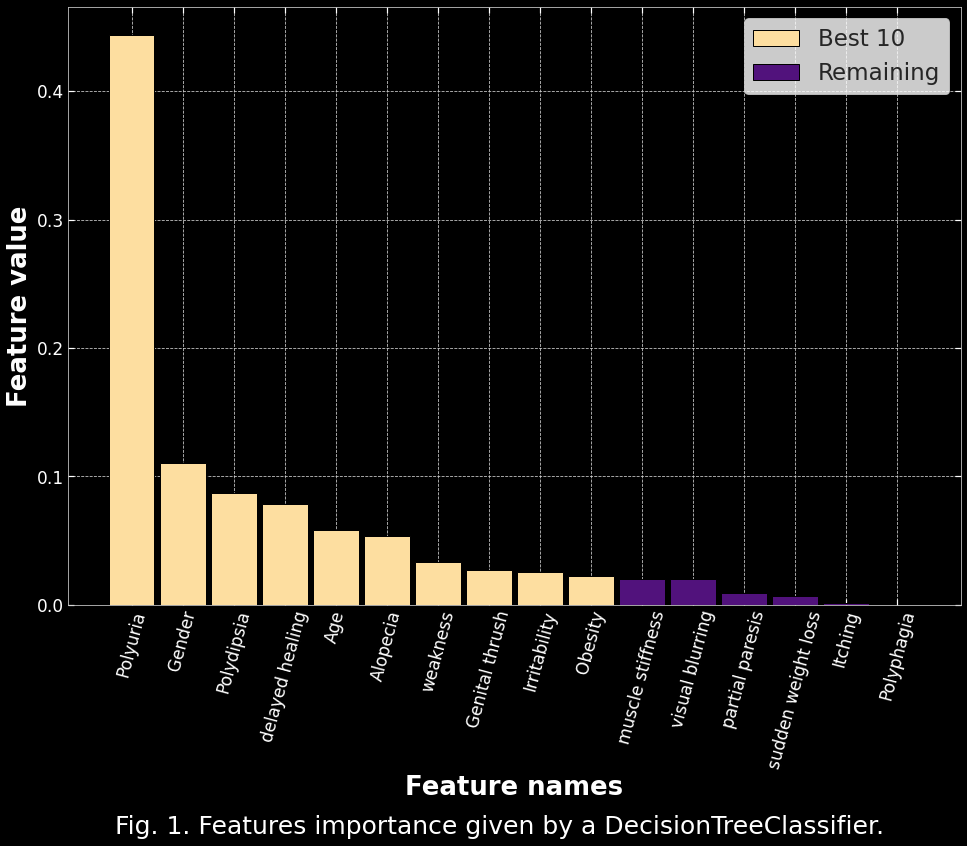

In [15]:
fig, axes = plt.subplots(figsize=(16,11),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

axes.bar(best_f[:10], best_fimp[:10], width=0.9, label='Best 10',
         color=cm.magma(0.93), edgecolor='black')
axes.bar(best_f[10:], best_fimp[10:], width=0.9, label='Remaining',
         color=cm.magma(0.25), edgecolor='black')

axes.set_xlabel('Feature names', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('Feature value', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='x', which='major', colors='white',
                 labelsize=axisticksize, labelrotation=75)
axes.tick_params(axis='y', which='major', colors='white',
                 labelsize=axisticksize)

axes.legend(loc='upper right', fontsize=axislegendsize)

plt.suptitle('Fig. 1. Features importance given by a DecisionTreeClassifier.',
             fontsize=axistitlesize+5, y=-0.14, color='white')

plt.show()

### 2./b. Visualize decision tree

In [16]:
import graphviz
from sklearn import tree

In [17]:
# Export to graphviz
dot_data = tree.export_graphviz(dtc, out_file=None,
                                feature_names=features,
                                class_names=['Negative', 'Positive'], # [0, 1]
                                filled=True, rounded=True,
                                special_characters=True,
                                precision=3)

In [18]:
# Save to svg file
graph = graphviz.Source(dot_data)
graph.render(filename='DTC_tree',
             directory=out,
             view=False,
             format='svg')

'./output/DTC_tree.svg'

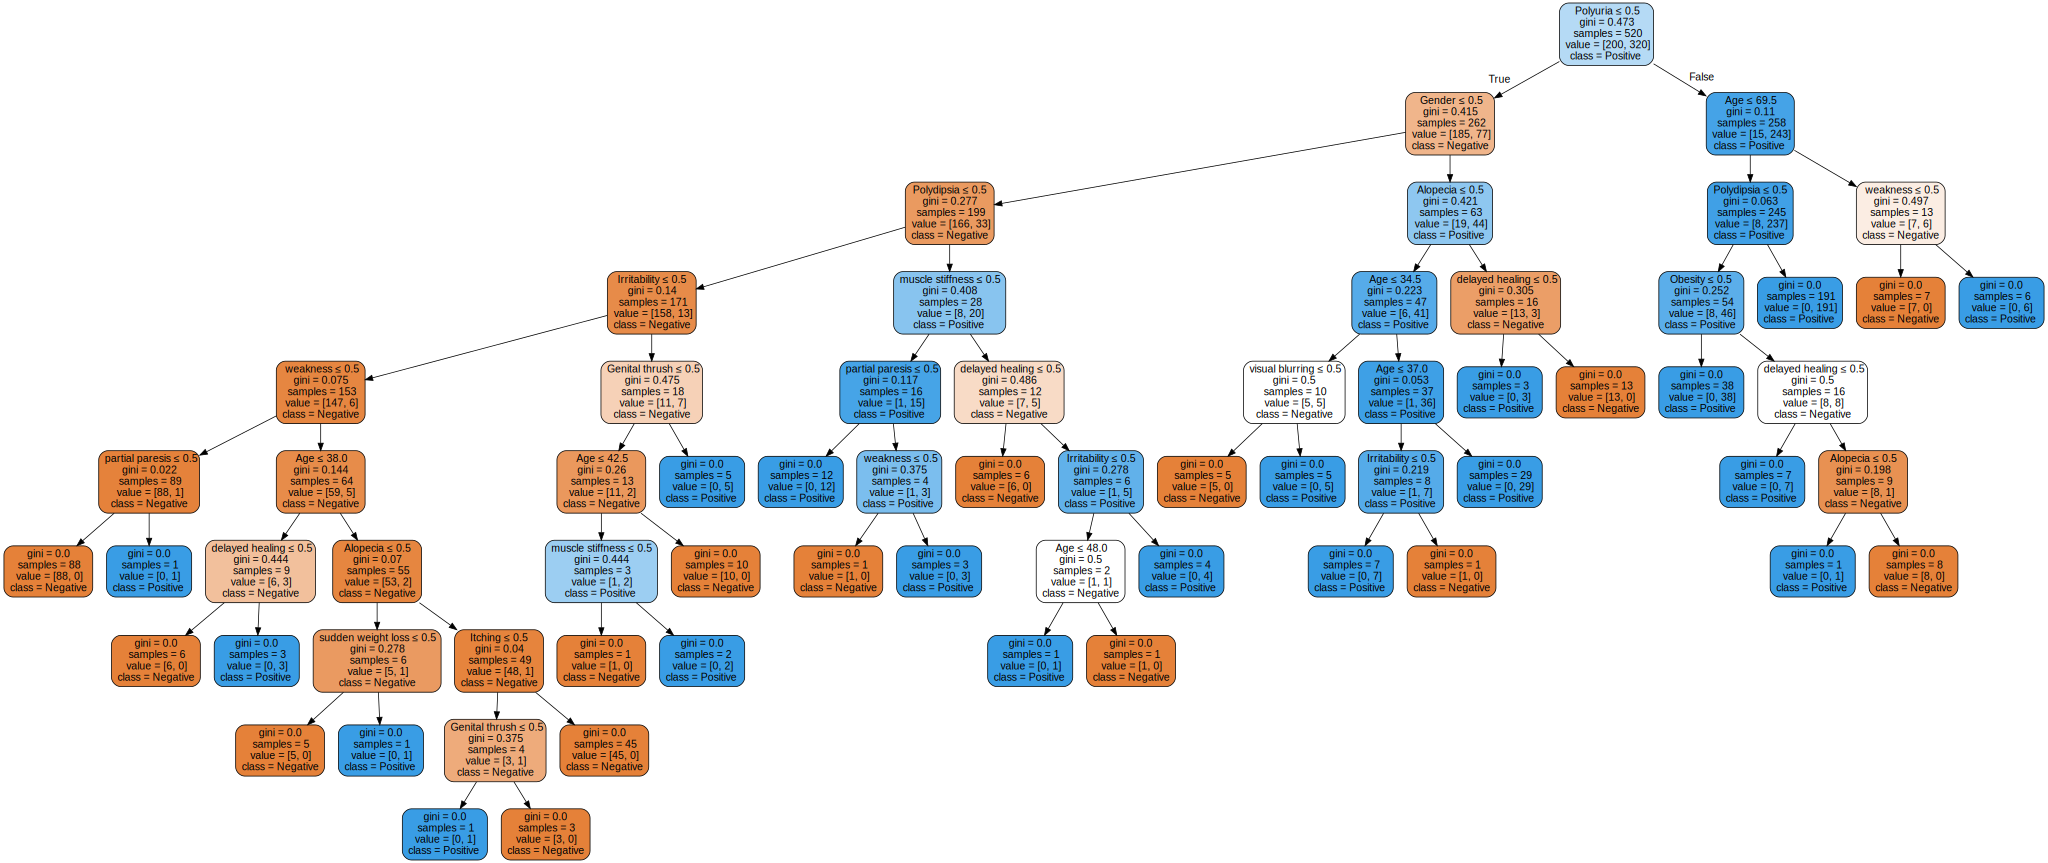

In [19]:
# Uncomment to plot
graph

### 2./c. Check Gini impurities for binary features

In [20]:
# Get probabilities of occureces
p1 = df_n[features[1:]].sum() / len(df_n)
p0 = 1 - p1

# Calculate Gini impurity
g = 2 * p0 * p1

In [21]:
g

Gender                0.465799
Polyuria              0.499970
Polydipsia            0.494608
sudden weight loss    0.486324
weakness              0.485022
Polyphagia            0.496087
Genital thrush        0.346627
visual blurring       0.494608
Itching               0.499638
Irritability          0.367189
delayed healing       0.496738
partial paresis       0.490414
muscle stiffness      0.468750
Alopecia              0.451472
Obesity               0.281183
dtype: float64

Using the graph above, we can find the `gini` values for every node in the decision tree. These values however do not match with my calculations. Eg. the Gini value for `Polyuria` is $0.473$ on the graph for $520$ samples, while I got practically $0.5$. Also eg. `Irritablity` sits on a solid $0.14$ for $171$ samples on the graph, while my calculations shows $0.367$.

## 3.  Random forest feature importance
 - train a random forest classifier on all the data using the sklearn API
 - use default values again, but fix the random_state to 42!
 - plot the 10 most important features' importances
    - create a bar plot where the height of the bar is the feature importance
    - show the 10 features where the feature importance is the highest
    - `feature_importance` attribute is helpful

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
# Define RFC modell
rfc = RandomForestClassifier(random_state=42)
# Fit modell
rfc.fit(X, y);
# Get useful fitted parameteres
feature_imp = pd.Series(rfc.feature_importances_,
                        index=features) # Feature importance

In [24]:
feature_imp

Age                   0.094117
Gender                0.108938
Polyuria              0.202978
Polydipsia            0.200431
sudden weight loss    0.047465
weakness              0.020783
Polyphagia            0.028957
Genital thrush        0.019902
visual blurring       0.027009
Itching               0.029982
Irritability          0.044897
delayed healing       0.032464
partial paresis       0.056276
muscle stiffness      0.025002
Alopecia              0.043341
Obesity               0.017460
dtype: float64

In [25]:
best_fimp, best_f = zip(*sorted(zip(feature_imp, features), reverse=True))

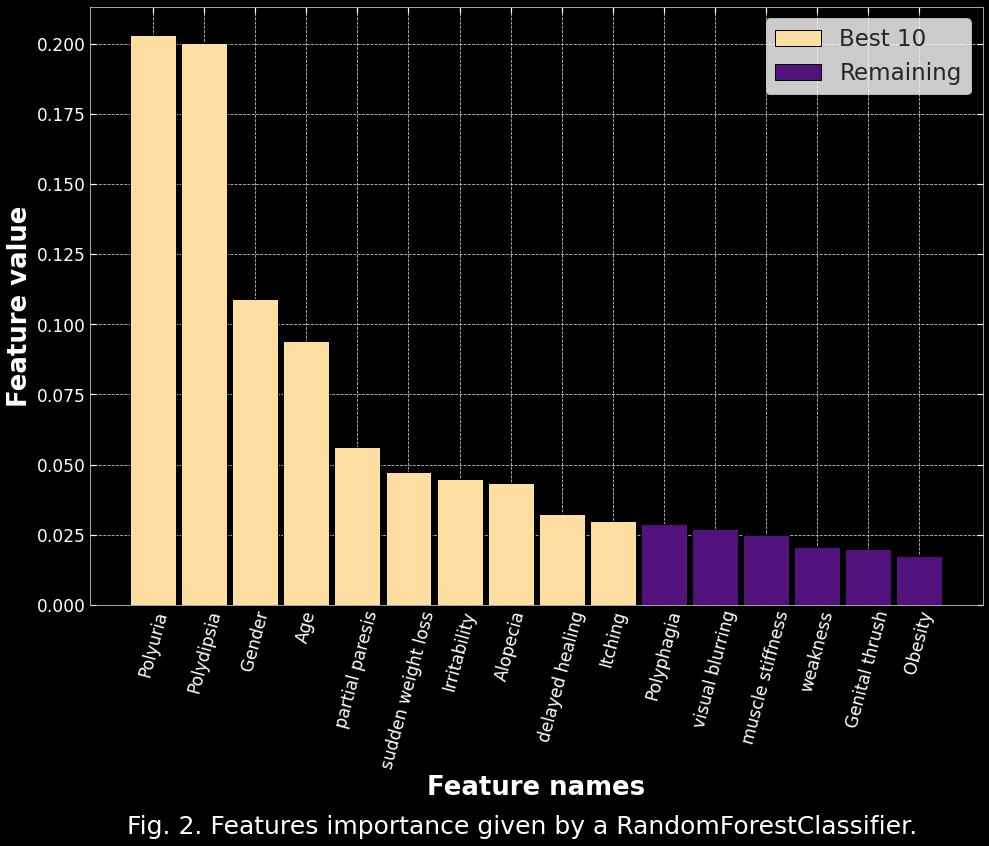

In [26]:
fig, axes = plt.subplots(figsize=(16,11),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

axes.bar(best_f[:10], best_fimp[:10], width=0.9, label='Best 10',
         color=cm.magma(0.93), edgecolor='black')
axes.bar(best_f[10:], best_fimp[10:], width=0.9, label='Remaining',
         color=cm.magma(0.25), edgecolor='black')

axes.set_xlabel('Feature names', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('Feature value', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='x', which='major', colors='white',
                 labelsize=axisticksize, labelrotation=75)
axes.tick_params(axis='y', which='major', colors='white',
                 labelsize=axisticksize)

axes.legend(loc='upper right', fontsize=axislegendsize)

plt.suptitle('Fig. 2. Features importance given by a RandomForestClassifier.',
             fontsize=axistitlesize+5, y=-0.14, color='white')

plt.show()

## 4. Evaluation
 - generate prediction probabilities with a decision tree and with a random forest model
 - use 5 fold cross validation for both time (so you should get 520 predictions)
 - use default parameters for both models
 - compare the two models with ROC curves
   - why does the decision tree's ROC curve looks different?

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### 4./prev. Get 5-fold CV scores for both model to get some insight

In [28]:
features = df_n.columns[:-1]
target = df_n.columns[-1]
X = df_n[features]
y = df_n[target]

#### `DecisionTreeClassifier()`

In [29]:
# Number of folds
folds = 5
# Invoke the KFold class from sklearn for CV tests
cv = KFold(n_splits=folds, shuffle=True, random_state=42)
# The model we use is linear regression
model = DecisionTreeClassifier()

In [30]:
# Test R^2 score
# Refrence: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scores = cross_val_score(model, X, y, scoring='r2', cv=cv)

print('KFOLD SCORES:\n' +
      '----------------')
print(scores)
print('Mean of scores : {0:.4f}'.format(np.mean(scores)))
print('Std of scores : {0:.4f}'.format(np.std(scores)))

KFOLD SCORES:
----------------
[0.77806231 0.76210446 0.84242424 0.796875   0.878125  ]
Mean of scores : 0.8115
Std of scores : 0.0428


#### `RandomForestClassifier()`

In [31]:
# Number of folds
folds = 5
# Invoke the KFold class from sklearn for CV tests
cv = KFold(n_splits=folds, shuffle=True, random_state=42)
# The model we use is linear regression
model = RandomForestClassifier()

In [32]:
# Test R^2 score
# Refrence: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scores = cross_val_score(model, X, y, scoring='r2', cv=cv)

print('KFOLD SCORES:\n' +
      '----------------')
print(scores)
print('Mean of scores : {0:.4f}'.format(np.mean(scores)))
print('Std of scores : {0:.4f}'.format(np.std(scores)))

KFOLD SCORES:
----------------
[0.95561246 0.84140297 0.92121212 0.8375     0.959375  ]
Mean of scores : 0.9030
Std of scores : 0.0536


### 4./a. Generate predictions for 5-fold CV and compare ROC curves

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [34]:
def accuracy_metric(y_test, y_pred):
    """
    Calculate accuracy of model prediction.
    
    Parameters
    ----------
    y_test : array-like of shape (N, )
        Original labels of the test dataset.
    
    y_pred : array-like of shape (N, )
        Predicted labels of the test dataset.
    
    Returns
    -------
    Accuracy of model in reference of the true test labels.
    """
    # Binarize labels
    y_test = label_binarize(y_test, classes=np.unique(y_test))
    y_pred = label_binarize(y_pred, classes=np.unique(y_pred))

    correct = 0
    for (t, p) in zip(y_test, y_pred):
        if all(t == p):
            correct += 1
    return correct / len(y_test) * 100

In [35]:
def plot_confusion_matrix(conf_mat, y, labels=None, title=None):
    """
    Plots a confusion matrix.
    """
    fig, axes = plt.subplots(figsize=(10,10))
    axes.set_aspect('equal')

    im = axes.imshow(conf_mat)
    # Loop over data dimensions and create text annotations.
    for X in range(conf_mat.shape[0]):
        for Y in range(conf_mat.shape[1]):
            axes.text(Y, X, conf_mat[X, Y], fontsize=30,
                      ha='center', va='center', color='white', fontweight='bold', 
                      bbox=dict(color=np.array((0,0,0,0.2)), lw=0)
                     )

    # Set axis tick locations and labels
    ticks = [i for i in range(len(set(y)))]
    if labels is None:
        ticklabels = [i+1 for i in range(len(set(y)))]
    else:
        ticklabels = list(labels)

    axes.set_xticks(ticks)
    axes.set_xticklabels(ticklabels)
    axes.set_yticks(ticks)
    axes.set_yticklabels(ticklabels)

    axes.set_xlabel('Predicted labels', fontsize=axislabelsize+5, fontweight='bold')
    axes.set_ylabel('True labels', fontsize=axislabelsize+5, fontweight='bold')
    axes.tick_params(axis='both', which='major', labelsize=axisticksize+5)
    axes.xaxis.tick_top()
    axes.xaxis.set_label_position('top') 

    axes.grid(False)

    # Create an axis on the right side of `axes`. The width of `cax` will be 5%
    # of `axes` and the padding between `cax` and axes will be fixed at 0.1 inch
    divider = make_axes_locatable(axes)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    cbar = plt.colorbar(mappable=im, cax=cax)
    cbar.ax.tick_params(labelsize=axiscbarfontsize, colors='black')
    cbar.set_label('Number of occurences', fontsize=axiscbarfontsize+10, labelpad=15, rotation=90)

    plt.suptitle(title,
                 fontsize=axistitlesize+5, y=0.1)

    plt.show()

In [36]:
def compute_roc(estimator, X, y):
    """
    Creates the ROC curve and computes AUC values an input X-y data-target set.
    
    Paramters
    ---------
    estimator : estimator instance
        Fitted classifier or a fitted :class:`~sklearn.pipeline.Pipeline`
        in which the last estimator is a classifier.
    
    X : {array-like, sparse matrix} of shape (n_test, n_features)
        Input values.
    
    y : array-like of shape (n_train,)
        Target values.
    
    Returns
    -------
    fpr : ndarray
        False positive rates.
    tpr : ndarray
        True positive rates.
    roc_auc : float
        Area under ROC curves.
    """
    from sklearn.metrics import _plot
    
    # Calculate scores for ROC curve
    # Small hack because I want to automate it. Also I have no trust in S.O. currently.
    # Using this: https://github.com/scikit-learn/scikit-learn/blob/0fb307bf3/sklearn/metrics/_plot/roc_curve.py#L114
    c_method = _plot.base._check_classifer_response_method(estimator,
                                                           response_method='auto')
    y_score = c_method(X)

    # Calculate ROC and AUC values
    pos_label = estimator.classes_[1]
    if y_score.ndim != 1:
        y_score = y_score[:, 1]
    fpr, tpr, _ = roc_curve(y, y_score, pos_label=pos_label)
    roc_auc = auc(fpr, tpr)
    
    return fpr, tpr, roc_auc

#### `DecisionTreeClassifier()`

In [37]:
# Number of folds
folds = 5
# Invoke the KFold class from sklearn for CV tests
cv = KFold(n_splits=folds, shuffle=True, random_state=42)
# The model we use is linear regression
model = DecisionTreeClassifier()
# Fit model
model.fit(X, y);

In [38]:
y_pred = cross_val_predict(model, X, y, cv=cv,
                           n_jobs=-1)

#### Confusion matrix

In [39]:
# Calculate and accuracy metric and the confusion matrix
accuracy = accuracy_metric(y_test=y, y_pred=y_pred)
conf_mat = confusion_matrix(y, y_pred, labels=[0,1])

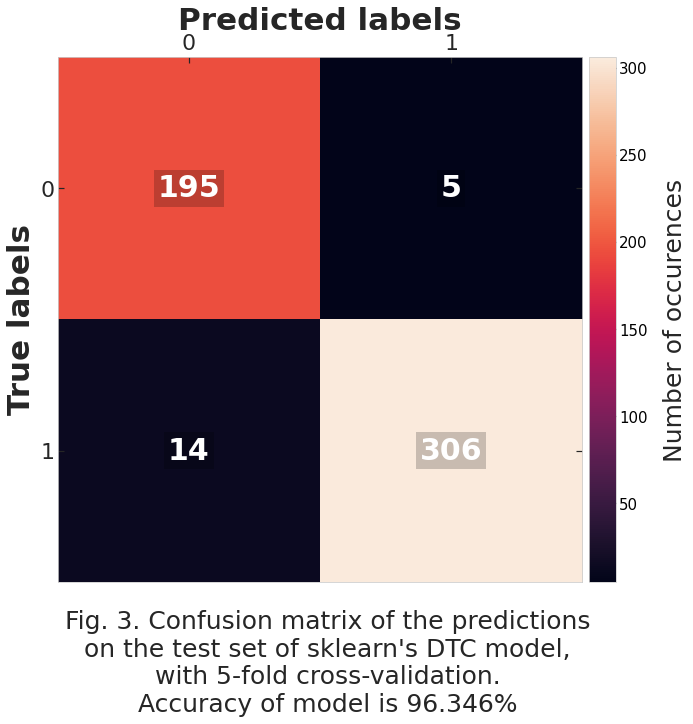

In [40]:
plot_confusion_matrix(conf_mat, y, labels=[0,1],
                      title=('Fig. 3. Confusion matrix of the predictions\n' +
                             'on the test set of sklearn\'s DTC model,\n' +
                             'with 5-fold cross-validation.\n'
                             'Accuracy of model is {0:.3f}%'.format(accuracy)))

#### ROC curve

In [41]:
fpr, tpr, roc_auc = compute_roc(model, X, y)

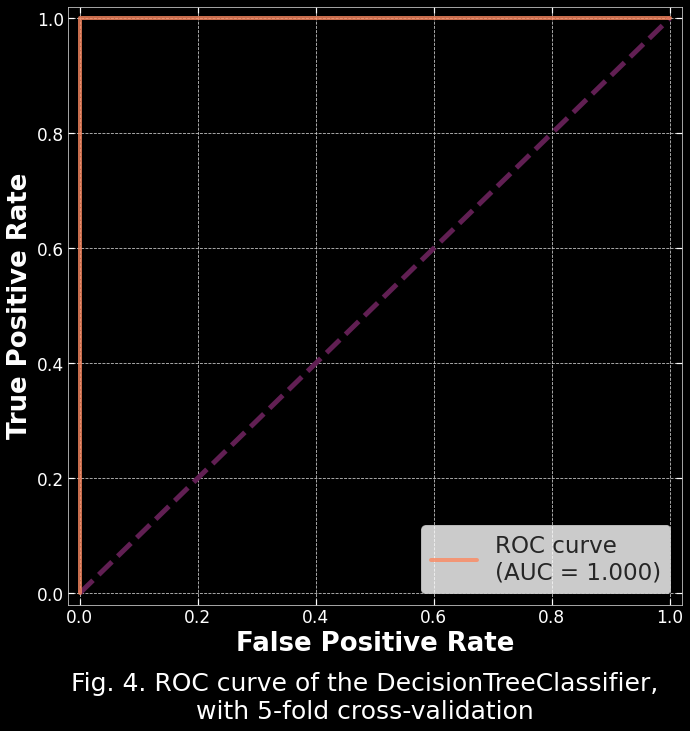

In [42]:
fig, axes = plt.subplots(figsize=(11, 11),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

axes.plot([0, 1], [0, 1], color=rocket_cmap(0.25), lw=5, linestyle='--')

# My model
axes.plot(fpr, tpr,
          label='ROC curve \n(AUC = %0.3f)' % roc_auc,
          color=cm.magma(0.75), lw=4, alpha=0.8)

axes.set_xlim([-0.02, 1.02])
axes.set_ylim([-0.02, 1.02])

axes.set_xlabel('False Positive Rate', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('True Positive Rate', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

axes.legend(loc='lower right', fontsize=axislegendsize)

plt.suptitle('Fig. 4. ROC curve of the DecisionTreeClassifier,\n' +
             'with 5-fold cross-validation',
             fontsize=axistitlesize+5, y=0.04, color='white')
    
plt.show()

#### `RandomForestClassifier()`

In [43]:
# Number of folds
folds = 5
# Invoke the KFold class from sklearn for CV tests
cv = KFold(n_splits=folds, shuffle=True, random_state=42)
# The model we use is linear regression
model = RandomForestClassifier()
# Fit for train
model.fit(X, y);

In [44]:
y_pred = cross_val_predict(model, X, y, cv=cv,
                           n_jobs=-1)

#### Confusion matrix

In [45]:
# Calculate and accuracy metric and the confusion matrix
accuracy = accuracy_metric(y_test=y, y_pred=y_pred)
conf_mat = confusion_matrix(y, y_pred, labels=[0,1])

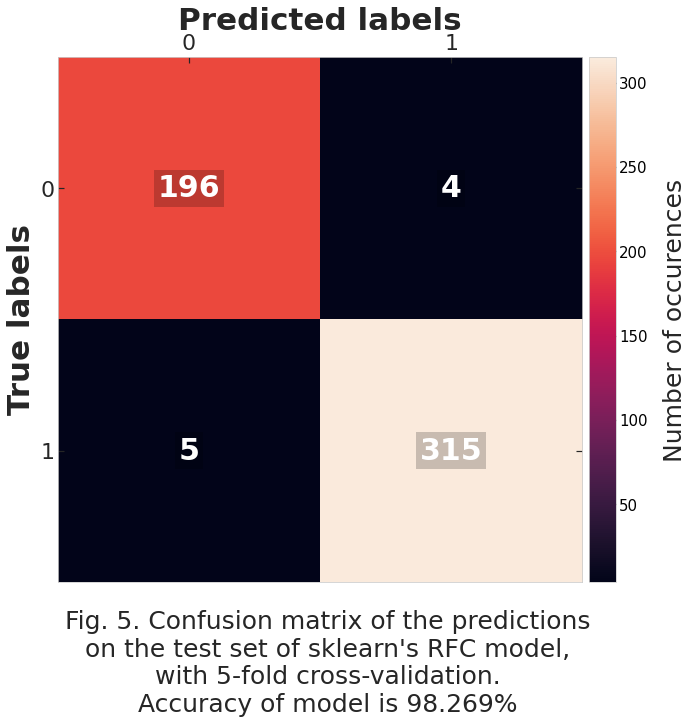

In [46]:
plot_confusion_matrix(conf_mat, y, labels=[0,1],
                      title=('Fig. 5. Confusion matrix of the predictions\n' +
                             'on the test set of sklearn\'s RFC model,\n' +
                             'with 5-fold cross-validation.\n'
                             'Accuracy of model is {0:.3f}%'.format(accuracy)))

#### ROC curve

In [47]:
fpr, tpr, roc_auc = compute_roc(model, X, y)

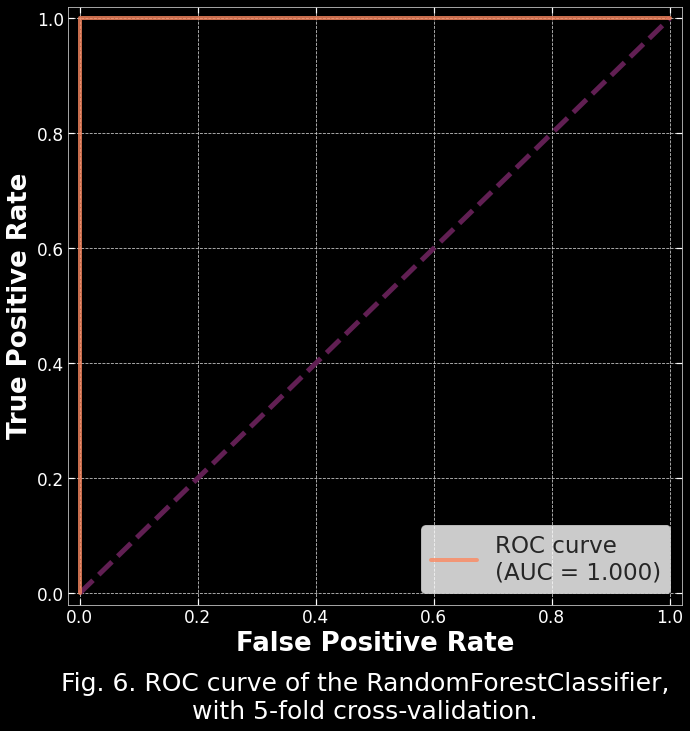

In [48]:
fig, axes = plt.subplots(figsize=(11, 11),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

axes.plot([0, 1], [0, 1], color=rocket_cmap(0.25), lw=5, linestyle='--')

# My model
axes.plot(fpr, tpr,
          label='ROC curve \n(AUC = %0.3f)' % roc_auc,
          color=cm.magma(0.75), lw=4, alpha=0.8)

axes.set_xlim([-0.02, 1.02])
axes.set_ylim([-0.02, 1.02])

axes.set_xlabel('False Positive Rate', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('True Positive Rate', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

axes.legend(loc='lower right', fontsize=axislegendsize)

plt.suptitle('Fig. 6. ROC curve of the RandomForestClassifier,\n' +
             'with 5-fold cross-validation.',
             fontsize=axistitlesize+5, y=0.04, color='white')
    
plt.show()

### 4./c. "Why does the Decision tree's ROC curves looks different?"

Looking at my ROC curves, I'm scared to answer this question.

## 5. Tuning model
  - using 80/20% train/test split generate predictions for a random forest model
  - plot the AUC vs number of trees in the forest for both the traing and the test data
  - do we experience overfitting if we use too many trees?

In [49]:
from sklearn.model_selection import train_test_split

### 5./a. Fit an RFC model

In [50]:
features = df_n.columns[:-1]
target = df_n.columns[-1]
X = df_n[features]
y = df_n[target]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [52]:
# Define RFC model
rfc = RandomForestClassifier(
    n_estimators=100,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
# Fit model
rfc.fit(X_train, y_train);
# Create predictions
y_pred = rfc.predict(X_test)

### 5./b. Analize results for test set

- Confusion matrix
- AUC, ROC

#### Confusion matrix

In [53]:
# Calculate and accuracy metric and the confusion matrix
accuracy = accuracy_metric(y_test=y_test, y_pred=y_pred)
conf_mat = confusion_matrix(y_test, y_pred, labels=[0,1])

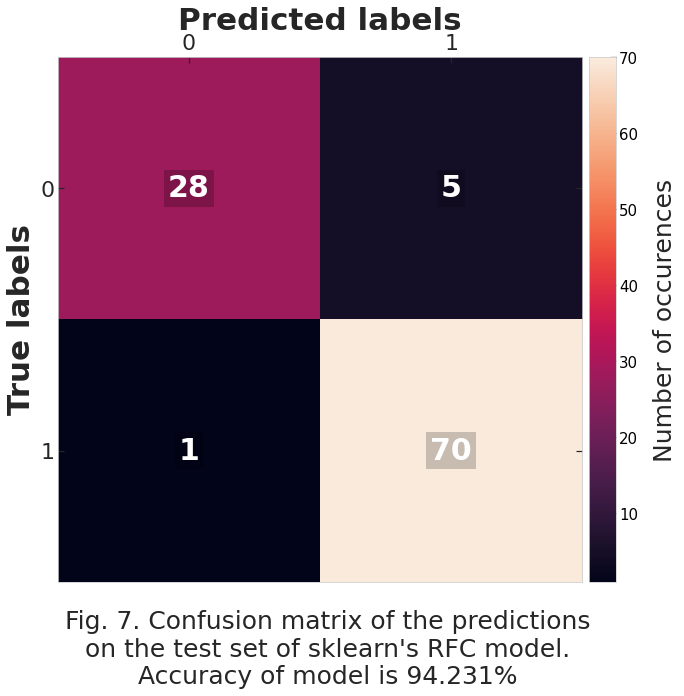

In [54]:
plot_confusion_matrix(conf_mat, y, labels=[0,1],
                      title=('Fig. 7. Confusion matrix of the predictions\n' +
                             'on the test set of sklearn\'s RFC model.\n' +
                             'Accuracy of model is {0:.3f}%'.format(accuracy)))

#### ROC curve

In [55]:
fpr_tr, tpr_tr, roc_auc_tr = compute_roc(rfc, X_train, y_train)
fpr_ts, tpr_ts, roc_auc_ts = compute_roc(rfc, X_test, y_test)

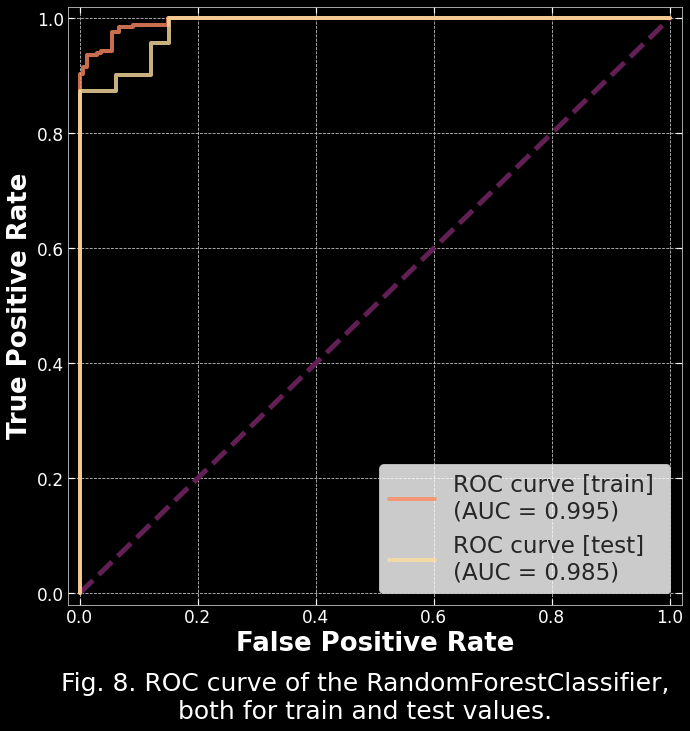

In [56]:
fig, axes = plt.subplots(figsize=(11, 11),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

axes.plot([0, 1], [0, 1], color=rocket_cmap(0.25), lw=5, linestyle='--')

# My model
axes.plot(fpr_tr, tpr_tr,
          label='ROC curve [train] \n(AUC = %0.3f)' % roc_auc_tr,
          color=cm.magma(0.75), lw=4, alpha=0.8)
axes.plot(fpr_ts, tpr_ts,
          label='ROC curve [test] \n(AUC = %0.3f)' % roc_auc_ts,
          color=cm.magma(0.93), lw=4, alpha=0.8)

axes.set_xlim([-0.02, 1.02])
axes.set_ylim([-0.02, 1.02])

axes.set_xlabel('False Positive Rate', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('True Positive Rate', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

axes.legend(loc='lower right', fontsize=axislegendsize)

plt.suptitle('Fig. 8. ROC curve of the RandomForestClassifier,\n' +
             'both for train and test values.',
             fontsize=axistitlesize+5, y=0.04, color='white')
    
plt.show()

### 5./c. Does it overfit?

In [57]:
features = df_n.columns[:-1]
target = df_n.columns[-1]
X = df_n[features]
y = df_n[target]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05,
                                                    random_state=42)

In [59]:
# Define RFC model
rfc = RandomForestClassifier(
    n_estimators=100,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
# Fit model
rfc.fit(X_train, y_train);
# Create predictions
y_pred = rfc.predict(X_test)

In [60]:
# Calculate and accuracy metric and the confusion matrix
accuracy = accuracy_metric(y_test=y_test, y_pred=y_pred)
conf_mat = confusion_matrix(y_test, y_pred, labels=[0,1])

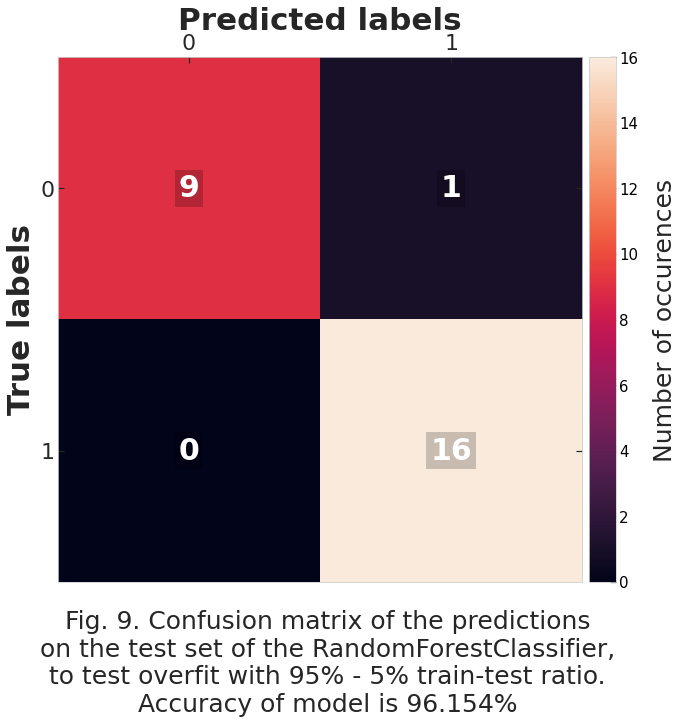

In [61]:
plot_confusion_matrix(conf_mat, y, labels=[0,1],
                      title=('Fig. 9. Confusion matrix of the predictions\n' +
                             'on the test set of the RandomForestClassifier,\n' +
                             'to test overfit with 95% - 5% train-test ratio.\n' +
                             'Accuracy of model is {0:.3f}%'.format(accuracy)))

In [62]:
fpr_tr, tpr_tr, roc_auc_tr = compute_roc(rfc, X_train, y_train)
fpr_ts, tpr_ts, roc_auc_ts = compute_roc(rfc, X_test, y_test)

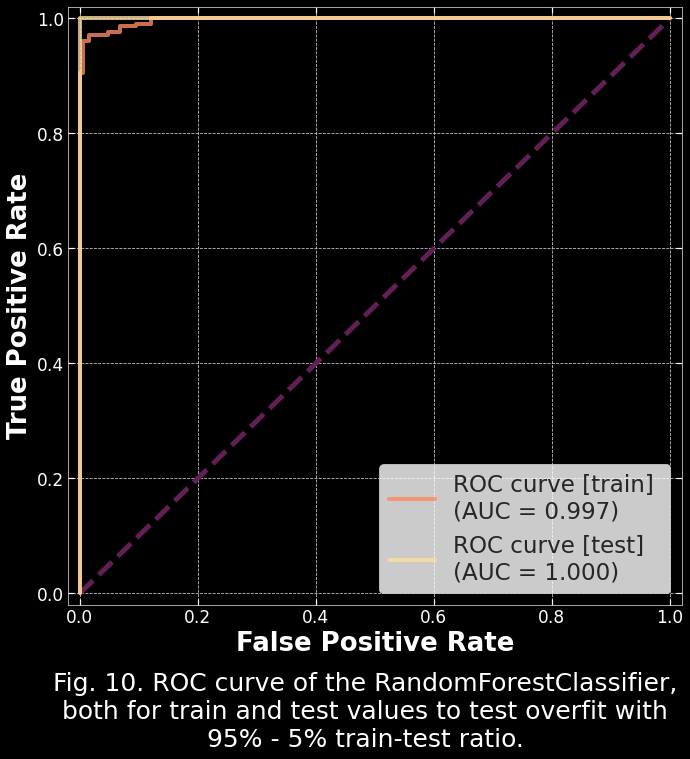

In [63]:
fig, axes = plt.subplots(figsize=(11, 11),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

axes.plot([0, 1], [0, 1], color=rocket_cmap(0.25), lw=5, linestyle='--')

# My model
axes.plot(fpr_tr, tpr_tr,
          label='ROC curve [train] \n(AUC = %0.3f)' % roc_auc_tr,
          color=cm.magma(0.75), lw=4, alpha=0.8)
axes.plot(fpr_ts, tpr_ts,
          label='ROC curve [test] \n(AUC = %0.3f)' % roc_auc_ts,
          color=cm.magma(0.93), lw=4, alpha=0.8)

axes.set_xlim([-0.02, 1.02])
axes.set_ylim([-0.02, 1.02])

axes.set_xlabel('False Positive Rate', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('True Positive Rate', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

axes.legend(loc='lower right', fontsize=axislegendsize)

plt.suptitle('Fig. 10. ROC curve of the RandomForestClassifier,\n' +
             'both for train and test values to test overfit with\n' +
             '95% - 5% train-test ratio.',
             fontsize=axistitlesize+5, y=0.04, color='white')
    
plt.show()

### Conclusion for overfitting

No, it doesn't seem so from these graphs...

### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 